<a href="https://colab.research.google.com/github/isabellamb/SeriesTiempo-FlujoVehicular/blob/main/Series_De_Tiempo_FlujoVehicular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SERIES DE TIEMPO**

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

** descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sb

# **1. Análisis exploratorio**





In [39]:
#Cargue de los datasets
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2017

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


Información de las columnas  **estacion, sentido, tipo_vehiculo y forma_pago**

In [40]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [41]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [42]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [43]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


En los datos de los años 2017, 2018 y 2019  las  columnas tienen la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Para los datos correspondientes a cada año, se cambia el formato de las fechas y se les agrega la hora fin, además de elimina la columna de hora_fin.
 

In [44]:
#Información de las columnas data 2019: tipo de datos y faltantes
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [45]:
data_2019.shape

(812153, 10)

In [46]:
#Quitamos las columnas que no vamos a utilizar
data_2019.drop(columns = ['hora_inicio'], inplace = True)

#Redefinimos la fecha en formato datetime agregando las hora_fin 
data_2019['fecha_com'] = pd.to_datetime(data_2019.fecha) + pd.to_timedelta(data_2019.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha_com
data_2019.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha_com a fecha
data_2019.rename(columns = {'fecha_com':'fecha'}, inplace = True) 
data_2019.head()
#Reordenamos el dataset por fecha
data_2019.sort_values('fecha', inplace = True)
data_2019.reset_index(drop=True, inplace = True)
data_2019

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2019,Martes,Sarmiento,Provincia,Pesado,TELEPASE,1,2019-01-01 00:00:00
1,2019,Martes,Avellaneda,Provincia,Liviano,EXENTO,12,2019-01-01 00:00:00
2,2019,Martes,Avellaneda,Provincia,Liviano,INFRACCION,11,2019-01-01 00:00:00
3,2019,Martes,Avellaneda,Provincia,Liviano,NO COBRADO,16,2019-01-01 00:00:00
4,2019,Martes,Avellaneda,Provincia,Liviano,T. DISCAPACIDAD,15,2019-01-01 00:00:00
...,...,...,...,...,...,...,...,...
812148,2019,Martes,Illia,Provincia,Liviano,INFRACCION,2,2019-12-31 23:00:00
812149,2019,Martes,Illia,Provincia,Liviano,EXENTO,3,2019-12-31 23:00:00
812150,2019,Martes,Illia,Provincia,Liviano,EFECTIVO,190,2019-12-31 23:00:00
812151,2019,Martes,PDB,Centro,Pesado,TELEPASE,13,2019-12-31 23:00:00


In [47]:
#Información de las columnas data 2018: tipo de datos y faltantes
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [48]:
data_2018.shape

(1375908, 10)

In [49]:
#Quitamos las columnas que no vamos a utilizar
data_2018.drop(columns = ['hora_inicio'], inplace = True)

#Redefinimos la fecha en formato datetime agregando las hora_fin 
data_2018['fecha_com'] = pd.to_datetime(data_2018.fecha) + pd.to_timedelta(data_2018.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha_com
data_2018.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha_com a fecha
data_2018.rename(columns = {'fecha_com':'fecha'}, inplace = True) 
data_2018.head()
#Reordenamos el dataset por fecha
data_2018.sort_values('fecha', inplace = True)
data_2018.reset_index(drop=True, inplace = True)
data_2018

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2018,Lunes,Dellepiane Centro,Centro,Pesado,EXENTO,4,2018-01-01 00:00:00
1,2018,Lunes,Dellepiane Centro,Centro,Pesado,TELEPASE,4,2018-01-01 00:00:00
2,2018,Lunes,Dellepiane Centro,Centro,Pesado,EFECTIVO,1,2018-01-01 00:00:00
3,2018,Lunes,Dellepiane Centro,Centro,Pesado,TELEPASE,1,2018-01-01 00:00:00
4,2018,Lunes,Dellepiane Centro,Centro,Pesado,EFECTIVO,1,2018-01-01 00:00:00
...,...,...,...,...,...,...,...,...
1375903,2018,Lunes,Avellaneda,Centro,Liviano,TARJETA DISCAPACIDAD,8,2018-12-31 23:00:00
1375904,2018,Lunes,Avellaneda,Centro,Liviano,EFECTIVO,473,2018-12-31 23:00:00
1375905,2018,Lunes,Avellaneda,Centro,Liviano,EXENTO,11,2018-12-31 23:00:00
1375906,2018,Lunes,Avellaneda,Centro,Liviano,NO COBRADO,1,2018-12-31 23:00:00


In [50]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [51]:
data_2017.shape

(1372645, 10)

In [52]:
#Quitamos las columnas que no vamos a utilizar
data_2017.drop(columns = ['hora_inicio'], inplace = True)

#Redefinimos la fecha en formato datetime con las hora_fin 
data_2017['fecha_com'] = pd.to_datetime(data_2017.fecha) + pd.to_timedelta(data_2017.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha_com
data_2017.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha_com a fecha
data_2017.rename(columns = {'fecha_com':'fecha'}, inplace = True) 
data_2017.head()
#Reordenamos el dataset por fecha
data_2017.sort_values('fecha', inplace = True)
data_2017.reset_index(drop=True, inplace = True)
data_2017

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2017,Domingo,Illia,Centro,Liviano,NO COBRADO,183,2017-01-01 00:00:00
1,2017,Domingo,Illia,Provincia,Pesado,TELEPASE,3,2017-01-01 00:00:00
2,2017,Domingo,Illia,Provincia,Pesado,EFECTIVO,1,2017-01-01 00:00:00
3,2017,Domingo,Illia,Provincia,Pesado,EFECTIVO,2,2017-01-01 00:00:00
4,2017,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,17,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...
1372640,2017,Domingo,Alberdi,Provincia,Liviano,TELEPASE,9,2017-12-31 23:00:00
1372641,2017,Domingo,Alberdi,Provincia,Liviano,EFECTIVO,65,2017-12-31 23:00:00
1372642,2017,Domingo,Alberdi,Provincia,Liviano,EXENTO,4,2017-12-31 23:00:00
1372643,2017,Domingo,Retiro,Provincia,Pesado,EFECTIVO,1,2017-12-31 23:00:00


**Analisis por año**




## 1.1 2017

In [53]:
data_2017.describe()

,periodo,cantidad_pasos
count,1372645.0,1.372645e+06
mean,2017.0,9.094375e+01
std,0.0,3.016382e+02
min,2017.0,1.000000e+00
25%,2017.0,2.000000e+00
50%,2017.0,7.000000e+00
75%,2017.0,2.800000e+01
max,2017.0,4.271000e+03


In [54]:
tipos_pagos7 = data_2017.groupby("forma_pago", as_index=False).sum()
tipos_pagos7


,forma_pago,periodo,cantidad_pasos
0,EFECTIVO,902008451,69502938
1,EXENTO,342666113,1677497
2,INFRACCION,282934675,629550
3,MONEDERO,28238,16
4,NO COBRADO,237461410,4845670
5,Otros,16136,22
6,TARJETA DISCAPACIDAD,201913802,1565099
7,TELEPASE,801596140,46612698


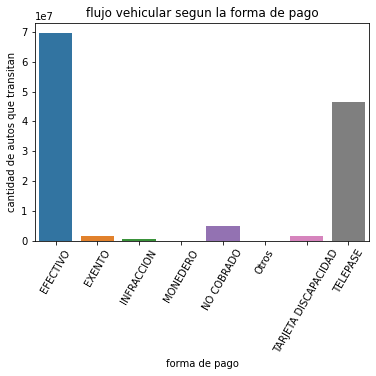

In [55]:
sb.barplot(x = "forma_pago", y ="cantidad_pasos", data = tipos_pagos7)
plt.xlabel("forma de pago")
plt.ylabel("cantidad de autos que transitan")
plt.title("flujo vehicular segun la forma de pago")
plt.xticks(rotation = 60)


plt.show( )

Para el 2017 la forma de pago mas usada fue el efectivo.

## 1.2 2018

In [56]:
data_2018.describe()

,periodo,cantidad_pasos
count,1375908.0,1.375908e+06
mean,2018.0,8.946361e+01
std,0.0,2.910907e+02
min,2018.0,1.000000e+00
25%,2018.0,2.000000e+00
50%,2018.0,6.000000e+00
75%,2018.0,2.600000e+01
max,2018.0,5.722000e+03


In [57]:
tipos_pagos8 = data_2018.groupby("forma_pago", as_index=False).sum()
tipos_pagos8

,forma_pago,periodo,cantidad_pasos
0,EFECTIVO,854891394,60225521
1,EXENTO,327123854,1250539
2,INFRACCION,309421958,720320
3,NO COBRADO,245065920,6072877
4,TARJETA DISCAPACIDAD,174250264,1061614
5,TELEPASE,865828954,53762821


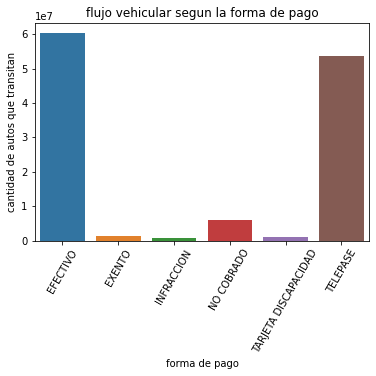

In [58]:
sb.barplot(x = "forma_pago", y ="cantidad_pasos", data = tipos_pagos8)
plt.xlabel("forma de pago")
plt.ylabel("cantidad de autos que transitan")
plt.title("flujo vehicular segun la forma de pago")
plt.xticks(rotation = 60)


plt.show( )

Para el 2018 la forma de pago mas usada fue el efectivo.

## 1.3 2019

In [62]:
data_2019.describe()

,periodo,cantidad_pasos
count,812153.0,812153.000000
mean,2019.0,156.018047
std,0.0,387.348842
min,2019.0,1.000000
25%,2019.0,4.000000
50%,2019.0,15.000000
75%,2019.0,72.000000
max,2019.0,6677.000000


In [63]:
tipos_pagos9 = data_2019.groupby("forma_pago", as_index=False).sum()
tipos_pagos9

,forma_pago,periodo,cantidad_pasos
0,EFECTIVO,301517460,53621459
1,EXENTO,267953604,1310757
2,INFRACCION,224973132,1098472
3,NO COBRADO,285244320,6267683
4,T. DISCAPACIDAD,153446019,841695
5,TELEPASE,406602372,63570459


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

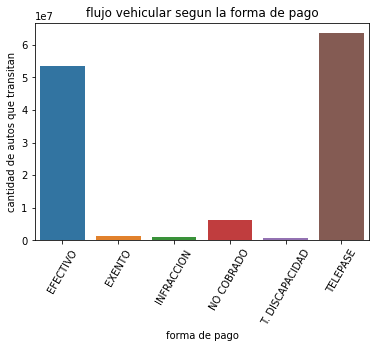

In [64]:
sb.barplot(x = "forma_pago", y ="cantidad_pasos", data = tipos_pagos9)
plt.xlabel("forma de pago")
plt.ylabel("cantidad de autos que transitan")
plt.title("flujo vehicular segun la forma de pago")
plt.xticks(rotation = 60)


Para el 2019 la forma de pago mas usada fue el efectivo.

## **1.4.Dataset completo**: 
Se organizan en una sola tabla los datos de los 3 años analizados (2017, 2018 y 2019)

In [65]:
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset = dataset[["periodo","forma_pago","estacion","cantidad_pasos","fecha"]]

In [66]:
dataset = dataset.reset_index() 
dataset

,index,periodo,forma_pago,estacion,cantidad_pasos,fecha
0,0,2019,TELEPASE,Sarmiento,1,2019-01-01 00:00:00
1,1,2019,EXENTO,Avellaneda,12,2019-01-01 00:00:00
2,2,2019,INFRACCION,Avellaneda,11,2019-01-01 00:00:00
3,3,2019,NO COBRADO,Avellaneda,16,2019-01-01 00:00:00
4,4,2019,T. DISCAPACIDAD,Avellaneda,15,2019-01-01 00:00:00
...,...,...,...,...,...,...
3560701,1372640,2017,TELEPASE,Alberdi,9,2017-12-31 23:00:00
3560702,1372641,2017,EFECTIVO,Alberdi,65,2017-12-31 23:00:00
3560703,1372642,2017,EXENTO,Alberdi,4,2017-12-31 23:00:00
3560704,1372643,2017,EFECTIVO,Retiro,1,2017-12-31 23:00:00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

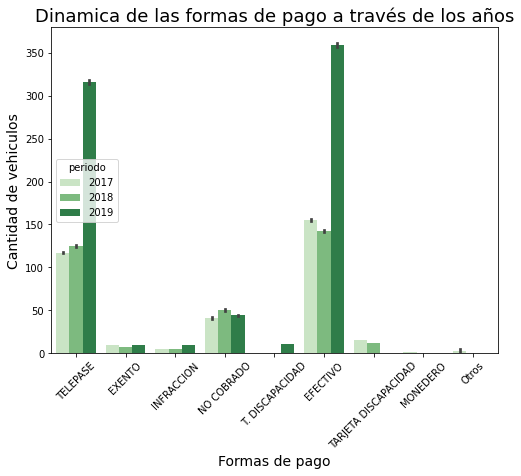

In [67]:
plt.figure(figsize=(8, 6)) 
sb.barplot(x="forma_pago", y="cantidad_pasos", 
            hue="periodo", data=dataset, 
            palette='Greens') 
  
plt.ylabel("Cantidad de vehiculos", size=14) 
plt.xlabel("Formas de pago", size=14) 
plt.title("Dinamica de las formas de pago a través de los años", size=18) 
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

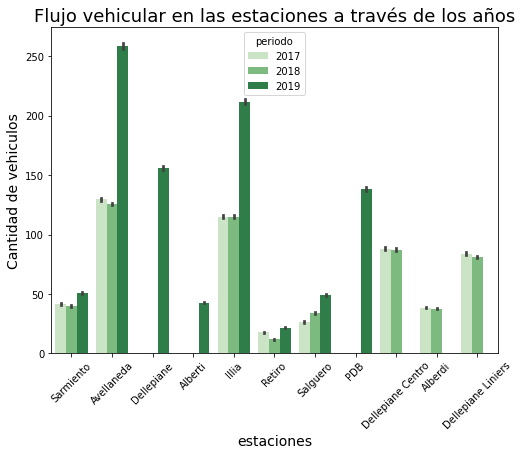

In [68]:
plt.figure(figsize=(8, 6)) 
sb.barplot(x="estacion", y="cantidad_pasos", 
            hue="periodo", data=dataset, 
            palette='Greens') 
  
plt.ylabel("Cantidad de vehiculos", size=14) 
plt.xlabel("estaciones", size=14) 
plt.title("Flujo vehicular en las estaciones a través de los años", size=18) 
plt.xticks(rotation = 45)

Luego de realizar el analisis por medio de pago y estación tanto por años como durnte el periodo de 3 años,  la forma de pago más usada sigue siendo el efectivo aunque ha tenido una disminución a lo largo de los años donde ha venido tomando fuerza el Telepase como forma de pago debido a las regulaciones Argentinas. Y la segunda estación mas transitada es la Illia ( y es la estación por donde se ingresa al centro de Buenos aires), por lo que vamos a filtrar nuestros datos para trabajar solo con los datos de la estación Illia y pagos en efectivo antes de analizar la serie de tiempo.

In [69]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
dataset 

,index,periodo,forma_pago,estacion,cantidad_pasos,fecha
43,43,2019,EFECTIVO,Illia,9,2019-01-01 00:00:00
53,53,2019,EFECTIVO,Illia,630,2019-01-01 00:00:00
56,56,2019,EFECTIVO,Illia,3,2019-01-01 00:00:00
66,66,2019,EFECTIVO,Illia,644,2019-01-01 00:00:00
152,152,2019,EFECTIVO,Illia,537,2019-01-01 02:00:00
...,...,...,...,...,...,...
3560689,1372628,2017,EFECTIVO,Illia,8,2017-12-31 23:00:00
3560692,1372631,2017,EFECTIVO,Illia,8,2017-12-31 23:00:00
3560693,1372632,2017,EFECTIVO,Illia,151,2017-12-31 23:00:00
3560696,1372635,2017,EFECTIVO,Illia,1,2017-12-31 23:00:00


**Anáisis valores faltantes**

In [70]:
dataset. isna().sum()

index             0
periodo           0
forma_pago        0
estacion          0
cantidad_pasos    0
fecha             0
dtype: int64

El dataset no tiene valores faltantes por lo que no requiere ningún tipo de imputación. 

**Valores atipicos**

In [71]:
dataset.describe()

,index,periodo,cantidad_pasos
count,2.388690e+05,238869.000000,238869.000000
mean,6.350017e+05,2017.708681,200.384232
std,3.892837e+05,0.704637,403.246904
min,2.000000e+00,2017.000000,1.000000
25%,3.003220e+05,2017.000000,2.000000
50%,6.102660e+05,2018.000000,11.000000
75%,9.563970e+05,2018.000000,104.000000
max,1.375889e+06,2019.000000,2416.000000


Al analizar los estadisticos de la cantidad de vehiculos, parece ser que hay presencia de valores atipicos si se considera que el valor maximo esta muy por encima de la media e incluso que los percentiles 50 y 75%

# **2. Preparacion data modelo**

Para El modelo de series de tiempo solo vamos a considerar como data de entrada la fecha y la cantidad de vehiculos que transitan ya que solo se está trabajando con dats de una estación y un medio de pago.


In [72]:
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','forma_pago', 'estacion', "index"], inplace = True)

dataset.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cantidad_pasos,fecha
43,9,2019-01-01 00:00:00
53,630,2019-01-01 00:00:00
56,3,2019-01-01 00:00:00
66,644,2019-01-01 00:00:00
152,537,2019-01-01 02:00:00


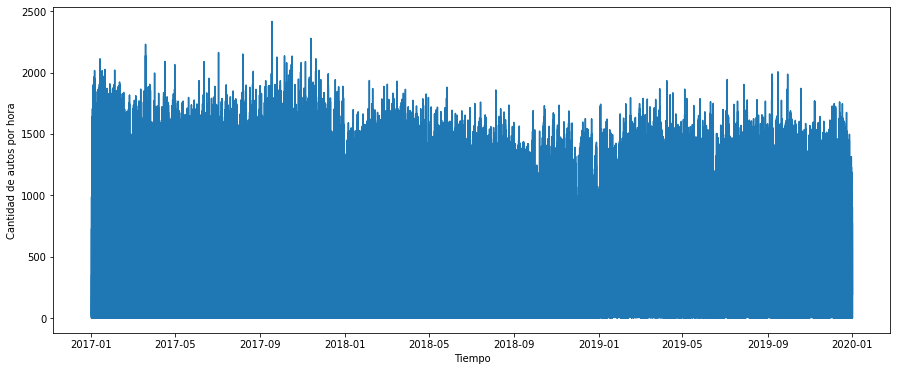

In [73]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por hora')
plt.show()

Dado que la información esta consignada por horas, el grafico es poco claro, para un mejor analisis se realiza un resampleo de los datos camiando la frecuencia de horas a dias.

In [77]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


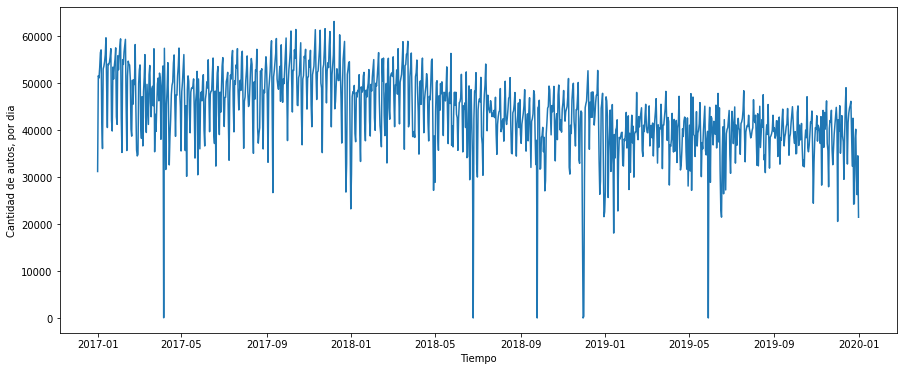

In [78]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

En la grafica obtenida se observa que al parecer hay dias donde el flujo es 0, sin embargo cuando se estudiaron los estadisticos el minimo de este valor era 1.

In [80]:
#Extraemos los dias de aparente flujo 0
diario.loc[diario.cantidad_pasos == 0]

,cantidad_pasos
fecha,
2018-06-25,0
2018-09-25,0
2018-11-30,0
2019-05-29,0


**Detección y eliminación de outliers**

In [79]:
data_2019['fecha'] = data_2019.fecha.diff()
data_2019.fecha.value_counts()

0 days 00:00:00    803393
0 days 01:00:00      8759
Name: fecha, dtype: int64

Según la grafica del resampleo a dias, parece ser que hay dias donde la cantidad de vehiculos es 0, sin embargo esto no es cierto, cuando se realizó el describe de la data al cargarla, se observó que la cantidad minima de vehiculos era 1, sin embargo al haber faltantes no de cantidad de pasos sino de fechas registradas e interrumpirse la fecuencia de la toma de datos, al realizar el resampleo se rellenan estos dias con 0 y es por eso que esto sucede.

Para evitar estos valores, lo que se hará será imputar a dichos valores un promedio de la cantidad de pasos.

In [81]:
dataset.isna().sum()


cantidad_pasos    0
fecha             0
dtype: int64

In [82]:
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    0
dtype: int64


In [83]:
diario.mean()

cantidad_pasos    43712.859361
dtype: float64

In [84]:
diario['cantidad_pasos'] = diario['cantidad_pasos'].replace( 0, 43872.859)

In [85]:
diario.loc[diario.cantidad_pasos == 0]

,cantidad_pasos
fecha,


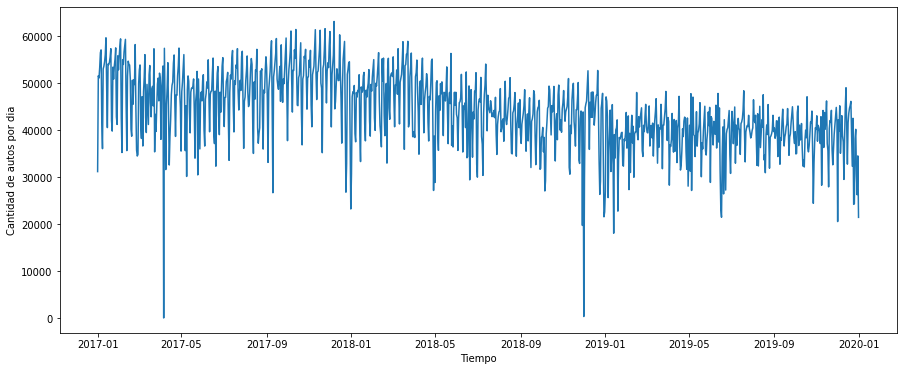

In [86]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por dia')
plt.show()

Una vez solucionado los aparentes datos en ceros, en la grafica aún se observan datos cercanos a cero, por lo que suponemos que hay registro con valores pequeños, así que analizaremos la distribución de la variable.

In [89]:
diario.loc[diario.cantidad_pasos <= 10000]

,cantidad_pasos
fecha,
2017-04-06,40.0
2018-12-01,350.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BoxPlot cantidad de pasos ')

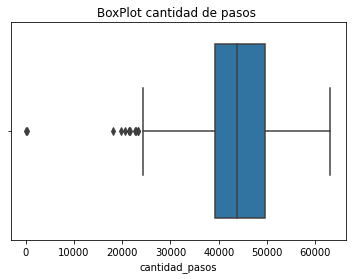

In [91]:
#Boxplots  variable
sb.boxplot(diario.cantidad_pasos)
plt.title("BoxPlot cantidad de pasos ")

Según se observa en el grafico hay valores minims muy  por debajo de la media, así que se procederá a filtrar el dataset.

In [94]:
diario.cantidad_pasos[diario.cantidad_pasos < 25000] = np.nan


In [93]:
print(diario.isna().sum())


cantidad_pasos    15
dtype: int64


In [95]:
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    0
dtype: int64


In [96]:
diario.shape

(1095, 1)

**Otras transformaciones**

No se hace necesario realizar transformaciones taes como encoding ya que no requerimos como entrada de nuestro modelo variables de tipo categorico dado que es una serie de tiempo, por la misma razón tampoco se considera necesario hacer escalado ni generación de nuevas variables.

# **3. Componenetes de la serie** 

In [97]:
#determinación tendencia
ventana = int(365*2/7)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

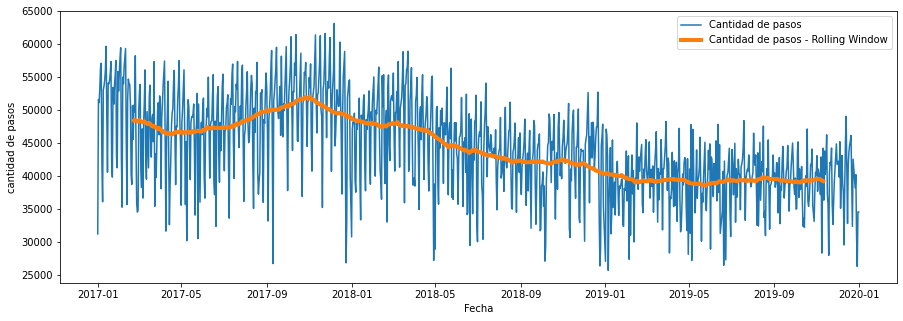

In [98]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('cantidad de pasos')
plt.legend()
plt.show()

Cuando nuestra tendencia es estática, es decir, que se mantiene “recta”, decimos que nuestra serie es estacionaria en la media

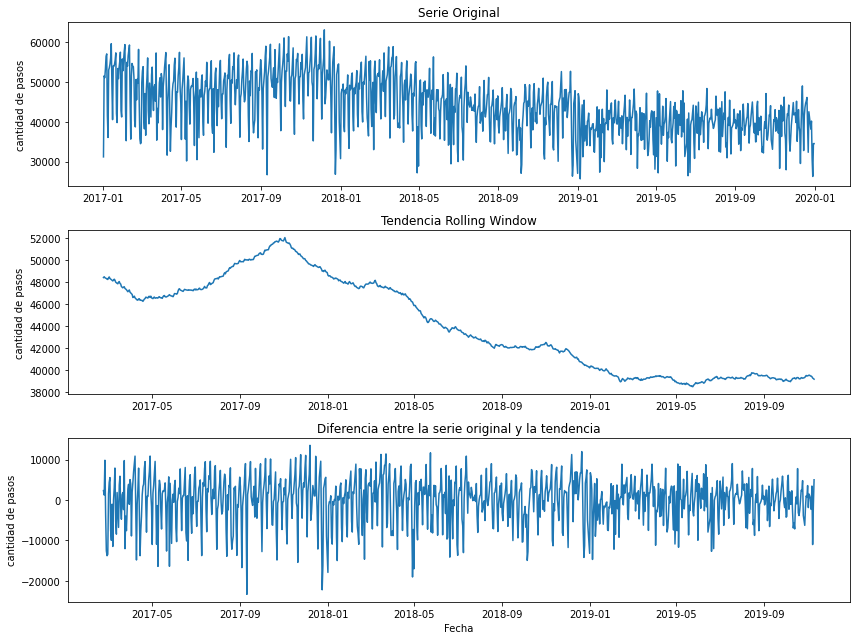

In [99]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('cantidad de pasos')

plt.tight_layout()
plt.show()


In [109]:
#Componentes usanso statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')


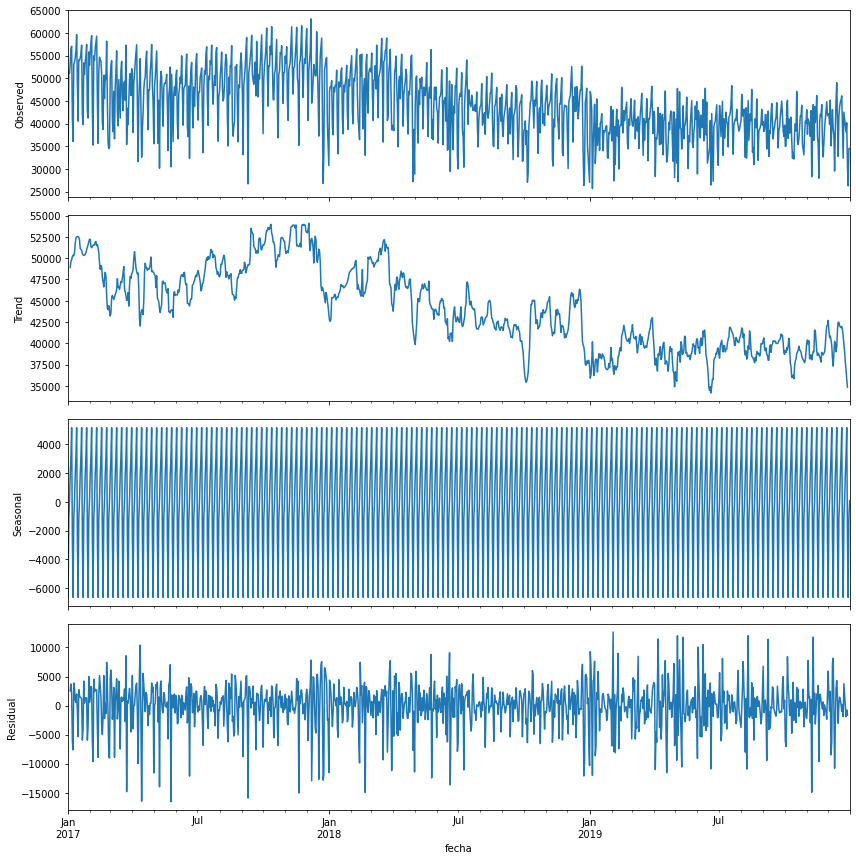

In [110]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Según lo observado la cantidad de vehiculos que transitan por la estación de Ilia diarimente es de alrededor de 450000 , con una componente de flujo del orden de -15000 vehiculos en temporada alta y del orden de 10000 vehiculos en temporada baja.

# **4.Modelo predicción**

## **4.1. One-Step Prediction**

Vamos a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo diaria de flujo vehicular. Se van a utilizar los 1000 primeros dias como conjunto de entrenamiento. Y los ultimos 3 meses como evaluación. Para ello, tenemos que llevar los datos a la forma vista durante la presentación.

In [116]:
dias = diario.cantidad_pasos
dias.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

Se utilizarán 130 dias para predecir el siguiente

In [117]:
look_back = 30*6


Se crean los X e y con ceros para luego llenar con los datos

In [118]:
N = dias.shape[0]
N

1095

In [119]:
N = dias.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(914, 180) (914,)


Se llenan los X e y:

In [120]:
for i in range(X.shape[0]):
#     X[i,:] = dias.values.iloc[i:i+look_back]
#     y[i] = dias.values.iloc[i+look_back]
    X[i,:] = dias.iloc[i:i+look_back]
    y[i] = dias.iloc[i+look_back]

In [ ]:
print(X)

In [ ]:
print(y)

Se hace el train/test split:

In [123]:
N_train = 30*33 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 30*3 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(810, 180) (810,)
(90, 180) (90,)


Se entrena el modelo:

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

Grafica de importancia de features:

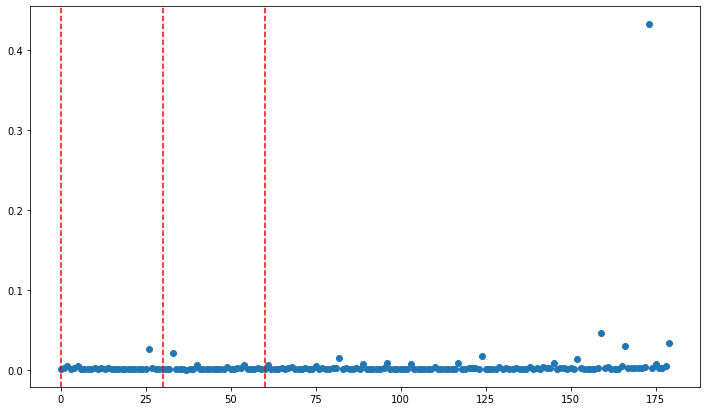

In [125]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*30:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

La mayor importancia está dada para los datos de 60 a 175

Predicción:

In [126]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

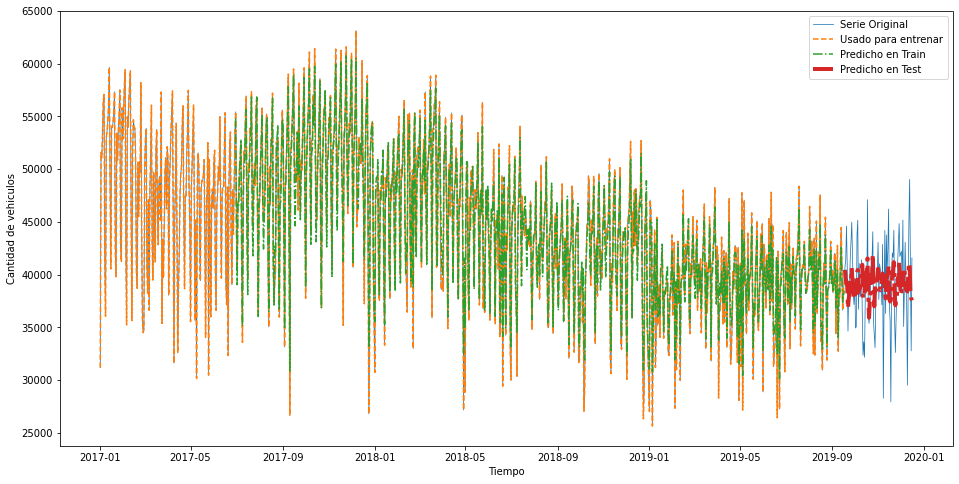

In [127]:
plt.figure(figsize=(16,8))
plt.plot(dias.index[:length_total], dias[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dias.index[:N_train + look_back], dias[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(dias.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(dias.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos')
plt.show()

Calculo del error RMSE en train y test

In [128]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1650.5234412622651
Error en Test: 3537.7122346793835


**Benchmark**: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [129]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

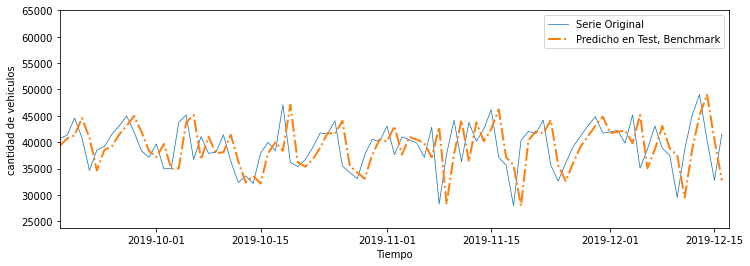

In [130]:
plt.figure(figsize=(12,4))
plt.plot(dias.index[:length_total], dias[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dias.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(dias.index[N_train+look_back], dias.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('cantidad de vehiculos')
plt.legend()
plt.show()

In [131]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

5117.726872244052


El modelo mejora la predicción sobre el benchmark con una reducción del error en test casi en un 50%

**Optimización hiperparametros**

In [132]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,5,10,20,30,40,50,70,85,100,150,200]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    rfOP = RandomForestRegressor(n_estimators=k, random_state=42, n_jobs = 4)
    
    # Entrenar el modelo
    rfOP.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = rfOP.predict(X_train)
    y_test_pred = rfOP.predict(X_test)
    
    # Errores
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(rmse_train)
    lista_accuracy_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

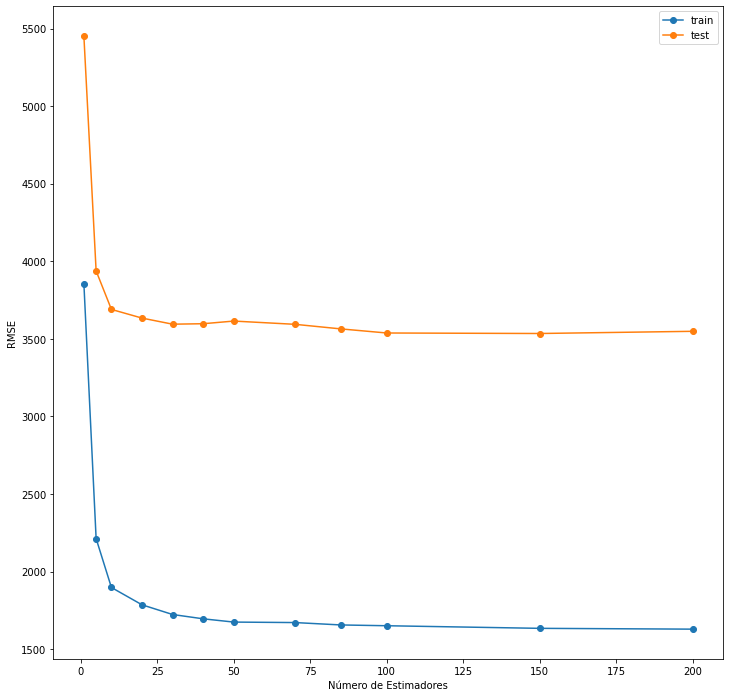

In [138]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Estimadores')
plt.ylabel('RMSE')

Se puede determinar entonces que a partir de 50  estimadores no se obtiene una reducción significativa del error.

## **4.2.Multi-Step Prediction**

Con el modelo ya entrenado, se usa el método recursivo para hacer Multi-Step prediction.

In [134]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

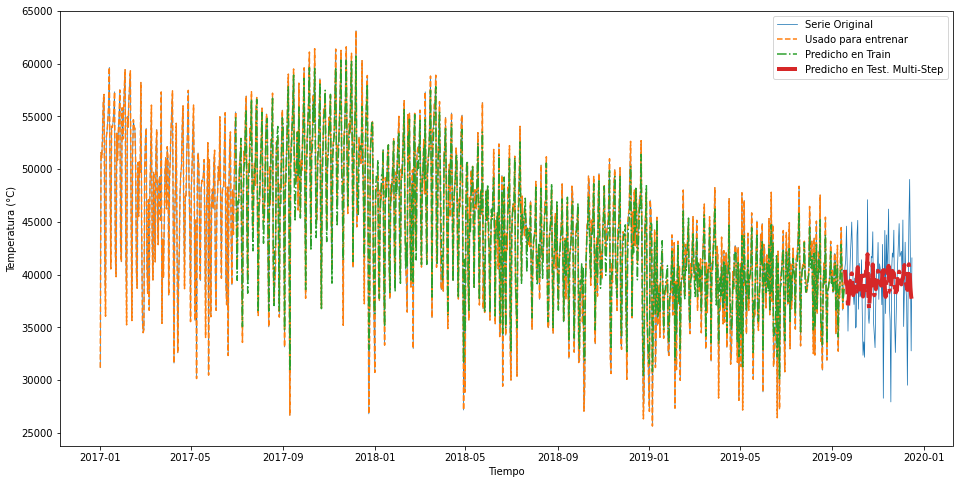

In [135]:
plt.figure(figsize=(16,8))
plt.plot(dias.index[:length_total], dias[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dias.index[:N_train + look_back], dias[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(dias.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(dias.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

In [136]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 3638.556262029163


Al comparar los errores se deduce que al utilizar el modelo one step predition se ajusta mejor el modelo.

Los modelos se basan en la cantidad de vehiculos que transitan diariamente por la estacion Illia y que pagan en efectivo el peaje. 

# **5. Investigación**

Al utilizar el modelo de serie de tiempo el principal supuesto es que la cantidad de vehiculos que transiten en el futuro depende de los que han transitado en el pasado, pero es el flujo un patrón temporal?, ¿hay otras variables que lo afecten?. Cuando se habla de flujo vehicular se deben tener en cuenta las características fundamentales de este, representadas en sus tres variables principales: el flujo, la velocidad y la densidad.
Mediante la deducción de relaciones entre ellas, se puede determinar las características de la
corriente de tránsito, y así predecir las consecuencias de diferentes opciones de operación o de
proyecto. De igual manera, el conocimiento de estas tres variables reviste singular importancia, ya
que éstas indican la calidad o Nivel de Servicio experimentado por los usuarios de cualquier
sistema vial.

Uno de los resultados más útiles del análisis del flujo vehicular es el desarrollo de los modelos
microscópicos y macroscópicos que relacionan sus diferentes variables. Estos modelos han sido la base del
desarrollo del concepto de Capacidad y Niveles de Servicio aplicado a diferentes tipos de
elementos viales. Por lo que resulta complejo la predicción del flujo vehicular sin tener en cuenta sus características, convendría entonces desarrollar modelos predictivos que tomen en consideración a estas, tales como modelos de regresión.